In [2]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Defining the filepath to be used later
filepath = '/Users/epalmer/MET4400C_Ins-obs_labs/Labs/Mini_lab1/ML_data/Mini_Lab_1_Data.csv'

In [55]:
#Read the data from the CSV file, and skipping the first 38 rows cause data is not needed
df = pd.read_csv(filepath, header = 38)

In [29]:
# Creating variables and doing unit conversions
Tsensed = df['101 (°C)- Tj'].values #Sensed temp in deg C
Tref = df['201 (°C)- Tc'].values #Reference temp in deg C
DelT = Tsensed - Tref #Delta T in deg C
E = df['202 (Vdc)- V_diff'].values #Voltage in microvolts
E = E * 1e6  # Convert V to µV

In [ ]:
#Looking at min an max values of Delta T and E (for refence for later linear regression plot)
print(f'Min value Delta T: {np.min(DelT)}')
print(f'Max value Delta T: {np.max(DelT)}')
print(f'Min value E: {np.min(E)}')
print(f'Max value E: {np.max(E)}')

Min value Delta T: 29.3091597156
Max value Delta T: 34.620302009
Min value E: 1158.30758
Max value E: 1382.37173


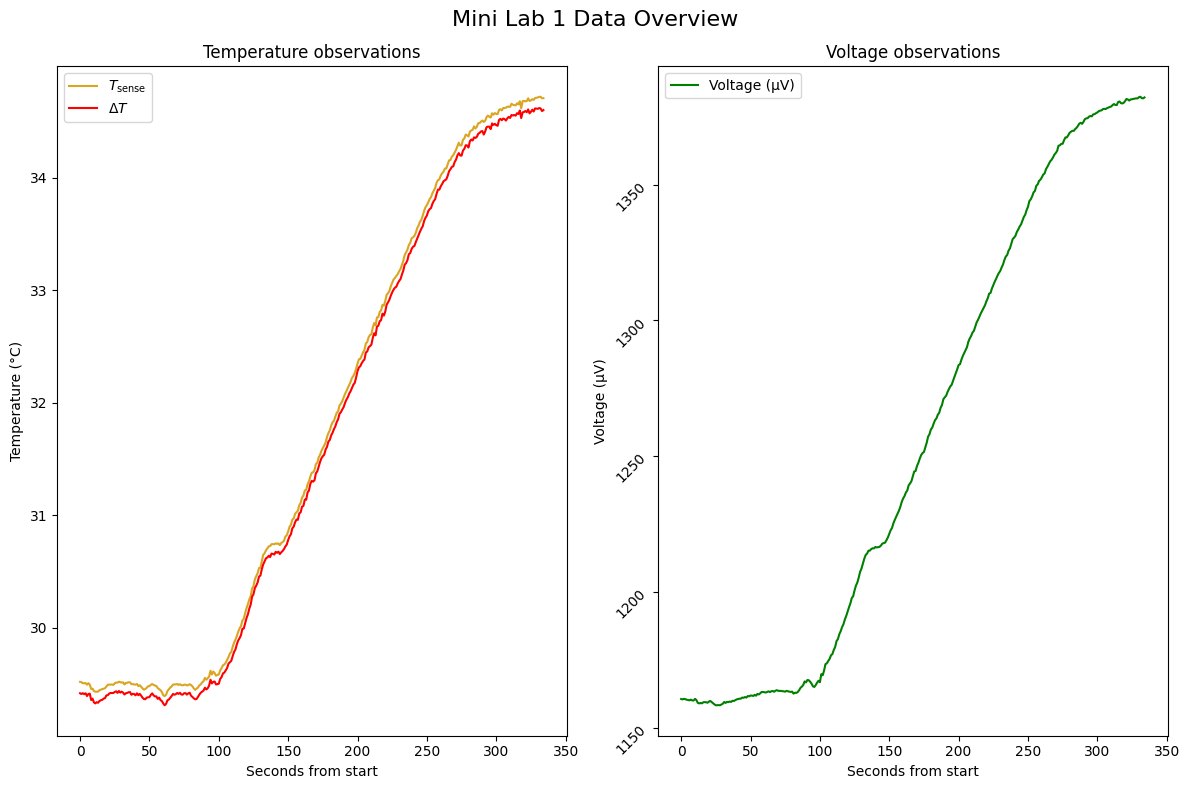

In [30]:
#Visualizing the Data
#Plot for temperature data
fig, axes = plt.subplots (1, 2, figsize = (12, 8))
axes[0].plot(Tsensed, c = 'goldenrod', label=r'$T_\mathrm{sense}$')
axes[0].plot(DelT, c = 'r', label = r'$\Delta T$')
axes[0].legend()
axes[0].set_xlabel('Seconds from start')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature observations')

## Plot for voltage data
axes[1].plot(E, c='green', label = 'Voltage (µV)')
axes[1].legend()
axes[1].set_xlabel('Seconds from start')
axes[1].set_ylabel('Voltage (µV)')
axes[1].set_title('Voltage observations')
axes[1].tick_params(axis='y', rotation=45)

#Making plot pretty
plt.suptitle('Mini Lab 1 Data Overview', fontsize = 16)
plt.tight_layout()

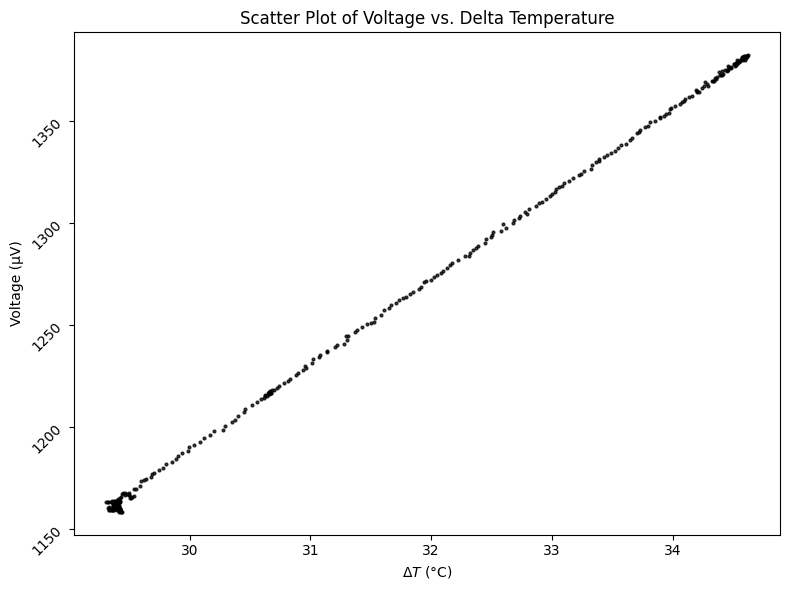

In [54]:
## Making scatter plot of voltage vs delta T

#Defining x and y vars
x = DelT
y = np.copy(E)

# Creating scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, c='k', s = 4, alpha=0.75)
plt.xlabel(r'$\Delta T$ (°C)')
plt.ylabel('Voltage (µV)')
plt.title('Scatter Plot of Voltage vs. Delta Temperature')
plt.tight_layout()
plt.tick_params(axis='y', rotation=45)

In [ ]:
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)  # units of µV/°C
b = np.mean(y) - m * np.mean(x)  # units of µV
print(f'Slope: {m:.2f} µV/K, Intercept: {b:.2f} µV')


Slope: 42.16 µV/K, Intercept: -77.10 µV


Text(0, 0.5, 'Voltage (µV)')

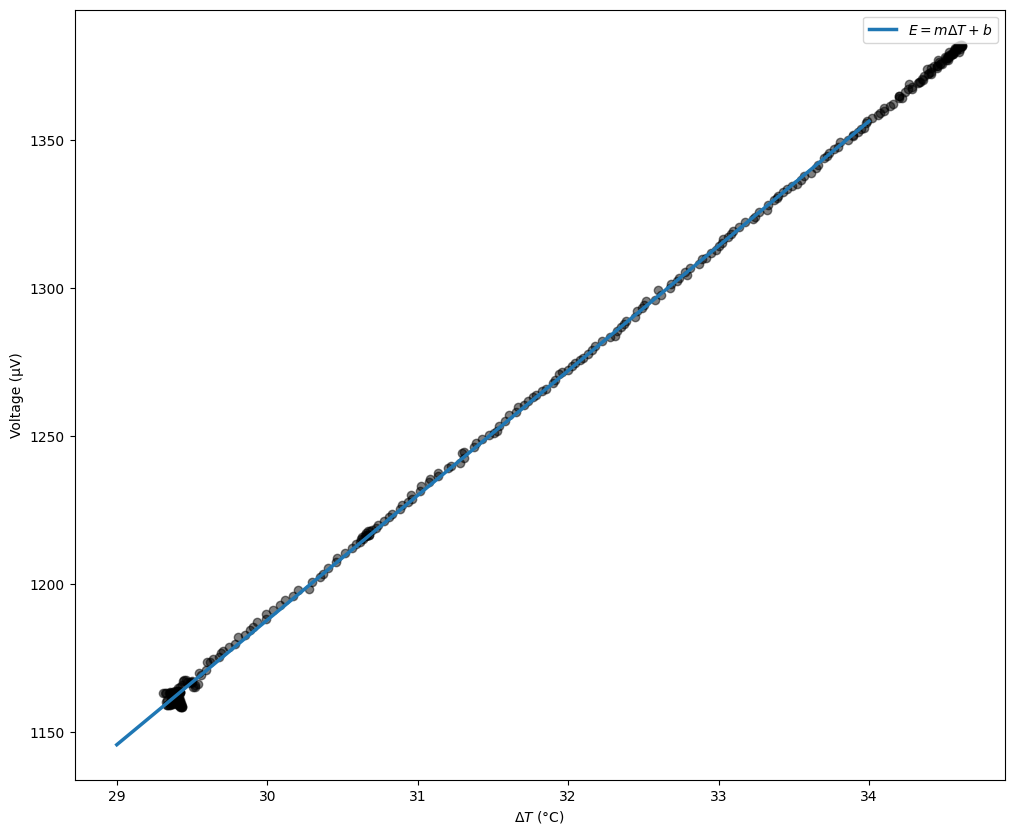

In [51]:
# Scatter Plot with best fit line
plt.figure(figsize=(12,10))
plt.scatter(x,y, c='k' , alpha = 0.5)
xx = np.arange(29,34+1) #Set the minimum and maximum values based on your experiment
plt.plot(xx,m*xx+b,lw=2.5,label=r'$E=m \Delta T+b$')
plt.legend()
plt.xlabel(r'$\Delta T$ (°C)')
plt.ylabel('Voltage (µV)')